In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

print('Workspace ready.')
print(f'Current Directory: {os.getcwd()}')


Workspace ready.
Current Directory: /Users/tombaroo/Documents/Legal_Tech_Project


In [3]:
if os.path.exists('CUAD_v1'):
    print('Folder found!')

else:
    print('no such luck')

Folder found!


In [4]:
data_path = 'CUAD_v1/full_contract_txt'
all_files = os.listdir(data_path)
contract_files = [f for f in all_files if f.endswith('.txt')]
print(f'Total contracts found: {len(contract_files)}')
print('\nFirst 10 contract filenames:')
for name in contract_files[10:20]:
    print(f'-{name}')

Total contracts found: 510

First 10 contract filenames:
-MetLife, Inc. - Remarketing Agreement.txt
-FTENETWORKS,INC_02_18_2016-EX-99.4-STRATEGIC ALLIANCE AGREEMENT.txt
-DOMINIADVISORTRUST_02_18_2005-EX-99.(H)(2)-SPONSORSHIP AGREEMENT.txt
-PfHospitalityGroupInc_20150923_10-12G_EX-10.1_9266710_EX-10.1_Franchise Agreement3.txt
-CerenceInc_20191002_8-K_EX-10.4_11827494_EX-10.4_Intellectual Property Agreement.txt
-ThriventVariableInsuranceAccountB_20190701_N-6_EX-99.D(IV)_11720968_EX-99.D(IV)_Endorsement Agreement.txt
-ReynoldsConsumerProductsInc_20191115_S-1_EX-10.18_11896469_EX-10.18_Supply Agreement.txt
-IntegrityFunds_20200121_485BPOS_EX-99.E UNDR CONTR_11948727_EX-99.E UNDR CONTR_Service Agreement.txt
-PREMIERBIOMEDICALINC_05_14_2020-EX-10.2-INTELLECTUAL PROPERTY AGREEMENT.txt
-SIBANNAC,INC_12_04_2017-EX-2.1-Strategic Alliance Agreement.txt


In [10]:
categories = {'IP': 0, 'Alliance':0, 'Supply':0, 'Other':0}
for name in contract_files:
    upper_name = name.upper()

    if 'INTELLECTUAL PROPERTY' in upper_name:
        categories['IP'] += 1
    elif 'ALLIANCE' in upper_name:
        categories['Alliance'] += 1
    elif 'SUPPLY' in upper_name:
        categories['Supply'] += 1
    else:
        categories['Other'] += 1
print('Contract Category Breakdown:')
print(f'\nIntellectual Property: {categories['IP']}')
print(f'Strategic Alliance: {categories['Alliance']}')
print(f'Supply Agreement: {categories['Supply']}')
print(f'All Other Types: {categories['Other']}')

Contract Category Breakdown:

Intellectual Property: 17
Strategic Alliance: 35
Supply Agreement: 25
All Other Types: 433


In [6]:
target_word = 'ARBITRATION'
found_count = 0

print(f"Scanning {len(contract_files)} files for '{target_word}'...\n")

for name in contract_files:
    file_path = os.path.join(data_path, name)

    with open(file_path, 'r', encoding='utf-8', errors='ignore') as f:
        content = f.read().upper()

        if target_word in content:
            found_count += 1

percentage = (found_count / len(contract_files)) * 100
print(f'Scan Complete.\n')
print(f'Contracts mentioning {target_word}: {found_count}\n')
print(f'Percentage of corpus: {percentage:.2f}%')

Scanning 510 files for 'ARBITRATION'...

Scan Complete.

Contracts mentioning ARBITRATION: 198

Percentage of corpus: 38.82%


In [7]:
arbitration_contracts = []

for name in contract_files:
    file_path = os.path.join(data_path, name)

    with open(file_path, 'r', encoding='utf-8', errors='ignore') as f:
        content = f.read().upper()

        if 'ARBITRATION' in content:
            arbitration_contracts.append(name)

print(f'I found {len(arbitration_contracts)} contracts with arbitration clauses.')
print(f'\nTop five on the hit list:')
for item in arbitration_contracts[:5]:
    print(f'FIX NEEDED: {item}')

I found 198 contracts with arbitration clauses.

Top five on the hit list:
FIX NEEDED: LohaCompanyltd_20191209_F-1_EX-10.16_11917878_EX-10.16_Supply Agreement.txt
FIX NEEDED: ADAMSGOLFINC_03_21_2005-EX-10.17-ENDORSEMENT AGREEMENT.txt
FIX NEEDED: KIROMICBIOPHARMA,INC_05_11_2020-EX-10.23-CONSULTING AGREEMENT.txt
FIX NEEDED: DovaPharmaceuticalsInc_20181108_10-Q_EX-10.2_11414857_EX-10.2_Promotion Agreement.txt
FIX NEEDED: PACIRA PHARMACEUTICALS, INC. - A_R STRATEGIC LICENSING, DISTRIBUTION AND MARKETING AGREEMENT .txt


In [8]:
with open('audit_results.txt', 'w') as output_file:
    output_file.write('LEGAL AUDIT: CONTRACTS REQUIRING ARBITRATION REVIEW\n')
    output_file.write('='*50 + '\n')

    for item in arbitration_contracts:
        output_file.write(f'- {item}\n')

print('Audit report saved to your folder as "audit_results.txt"')

Audit report saved to your folder as "audit_results.txt"


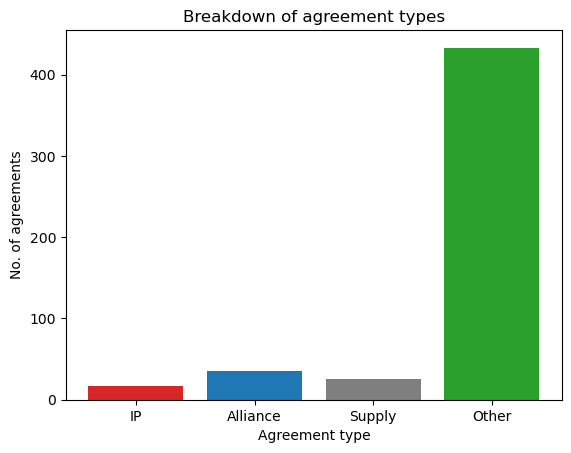

In [33]:
names = list(categories.keys())
values = list(categories.values())
plt.bar(names, values, color=['tab:red', 'tab:blue', 'tab:gray', 'tab:green'])
plt.xlabel('Agreement type')
plt.ylabel('No. of agreements')
plt.title('Breakdown of agreement types')
plt.show()

In [25]:
target_company = 'GOLDMAN SACHS'
results = []

for name in contract_files:
    file_path = os.path.join(data_path, name)

    with open(file_path, 'r', encoding='utf-8', errors='ignore') as f:
        content = f.read().upper()

        if target_company in content :
            results.append(name)

print(f'Found {len(results)} contracts mentioning {target_company}.')

Found 1 contracts mentioning GOLDMAN SACHS.


In [36]:
results = []

for name in contract_files:
    file_path = os.path.join(data_path, name)
    with open(file_path, 'r', encoding='utf-8', errors='ignore') as f:
        content = f.read().upper()

        if 'ARBITRATION' in content or 'LITIGATION' in content:
            results.append(name)

print(f'Audit found {len(results)} potential dispute resolution clauses.')

Audit found 264 potential dispute resolution clauses.


In [40]:
total_characters = 0
file_count = len(contract_files)

for name in contract_files:
    file_path = os.path.join(data_path, name)
    with open(file_path, 'r', encoding='utf-8', errors='ignore') as f:
        content = f.read()

        total_characters += len(content)

average = total_characters / file_count
print(f'The average contract length is {average:,.2f} characters.')

The average contract length is 52,563.01 characters.


In [44]:
print(len(content[:500]))

500


In [47]:
target_company_2 = 'APPLE'
results = []

for name in contract_files:
    file_path = os.path.join(data_path, name)
        
    with open(file_path, 'r', encoding = 'utf-8', errors='ignore') as f:
            content = f.read().upper()

            if target_company_2 in content:
                results.append(name)

print(f'A review of the data has shown that {target_company_2} appears {len(results)} times.')

A review of the data has shown that APPLE appears 11 times.


In [53]:
preambles = []

for name in contract_files:
    file_path = os.path.join(data_path, name)
    with open(file_path, 'r', encoding='utf-8', errors='ignore') as f:

        content_snippet = f.read(500)

        preambles.append(content_snippet)

print(f'Here are the preambles from {len(preambles)} documents')
print(preambles[0])


Here are the preambles from 510 documents
EXHIBIT 10.6

                              DISTRIBUTOR AGREEMENT

         THIS  DISTRIBUTOR  AGREEMENT (the  "Agreement")  is made by and between Electric City Corp.,  a Delaware  corporation  ("Company")  and Electric City of Illinois LLC ("Distributor") this 7th day of September, 1999.

                                    RECITALS

         A. The  Company's  Business.  The Company is  presently  engaged in the business  of selling an energy  efficiency  device,  which is  referred to as an 


In [55]:
matches = []

for text in preambles:
    if '2019' in text:
        matches.append(text)

print(f'Found {len(matches)} contracts from 2019.')

Found 47 contracts from 2019.


In [57]:
precise_matches = []

for text in preambles:
    if '2019' and 'New York' in text:
        precise_matches.append(text)

print(f'Found {len(precise_matches)} contracts mentioning New York and 2019.')

Found 20 contracts mentioning New York and 2019.


In [59]:
with open('search_results_NY_2019.txt', 'w', encoding='utf-8') as output_file:
    for item in precise_matches:
        output_file.write(item)

        output_file.write('\n' + '='*30 + '\n')

print('Results saved to search_results_NY_2019')

Results saved to search_results_NY_2019


In [60]:
import csv

with open('contract_report.csv', 'w', newline='', encoding='utf-8') as f:
    writer = csv.writer(f)
    writer.writerow(['Filename', 'Preamble Snippet'])

    for i in range(len(contract_files)):
        writer.writerow([contract_files[i], preambles[i]])